# Final Project Submission : OSEMN with King County House Sales Dataset

Please fill out:
* Student name: Emily J. Cain
* Student pace: full time
* Scheduled project review date/time: Tuesday, October 30, 2018, 1400 EST
* Instructor name: Rafael Carrasco


## Obtain

Read in from csv file

In [1]:
# disable autoscroll

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
# Check that csv loaded successfully 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Scrub

* Change values to correct type as needed
* Replace or remove missing or placeholder values
* Change formatting as needed
* Check for typos and duplicates 

In [4]:
df.shape
# With less than 22,000 rows, I think I will be able to work with and manipulate the entire dataset

(21597, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


One initial question that will need to be answered: why are there two columns for square foot living (sqft_living, sqft_living15) and square foot lot (sqft_lot, sqft_lot15)?

In [7]:
# Can probably delete these cells because now I know! The '15' values were taken in 2015 and imply renovation.

In [8]:
square_feet = df[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']].copy()
square_feet.head()

,sqft_living,sqft_lot,sqft_living15,sqft_lot15
0,1180,5650,1340,5650
1,2570,7242,1690,7639
2,770,10000,2720,8062
3,1960,5000,1360,5000
4,1680,8080,1800,7503


In [9]:
square_feet.describe()
# The relationship between these values - and whether to keep each one - is not immediately apparent.

,sqft_living,sqft_lot,sqft_living15,sqft_lot15
count,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,2080.321850,1.509941e+04,1986.620318,12758.283512
std,918.106125,4.141264e+04,685.230472,27274.441950
min,370.000000,5.200000e+02,399.000000,651.000000
25%,1430.000000,5.040000e+03,1490.000000,5100.000000
50%,1910.000000,7.618000e+03,1840.000000,7620.000000
75%,2550.000000,1.068500e+04,2360.000000,10083.000000
max,13540.000000,1.651359e+06,6210.000000,871200.000000


In [6]:
# check for null values
df.isna().sum()
# 2376 null values for waterfront, 63 for view, 3842 for yr_renovated

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
df.view.unique()
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

According to the Kaggle website, this value represents how many times a home has been viewed. This value will most likely need to be changed to a categorical variable, but I want to do some exploratory analysis first. Since there are only 63 null values, and the majority of values are '0.0,' the null values can be changed to the mode of this dataset. If this value ends up being cast as a categorical variable, replacing the null values with '0.0' will also make the most sense. 

In [7]:
# change null values to the mode 0.0
df.view.fillna(0.0, inplace=True)
df.view.unique()

array([0., 3., 4., 2., 1.])

In [13]:
# change values to category
# df.view = df.view.astype('category')

About 10% of the waterfront values are null, and less than 1% of the properties have a value of '1.0,' which I assume to mean 'True' for waterfront. I am going to change the null values to '0.0' or 'False,' and then change the dtype to 'bool.' Because there are so few 'True' values in this column, it may not be worthwhile to keep it in the dataset. 

In [8]:
# df.waterfront.unique()
# df.waterfront.value_counts()
# df.waterfront.isna().sum()
df.waterfront.fillna(0.0, inplace=True)
df.waterfront.unique()

array([0., 1.])

In [9]:
# change values to bool
df.waterfront = df.waterfront.astype('bool')

In [10]:
# confirm dtype change
df.waterfront.value_counts()

False    21451
True       146
Name: waterfront, dtype: int64

Similar to the 'waterfront' variable, the 'yr_renovated' variable contains a vast majority (96.5%) of '0.0' or null variables. Even if the 'yr_renovated' variable does have a high correlation with 'price,' the information available to us is so small that it may not be reliable or representative of the data overall. I will change the null variables to '0.0,' but I may end up dropping this column. 

In [17]:
# df.yr_renovated.unique()
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [11]:
df.yr_renovated.fillna(0.0, inplace=True)

In [12]:
# confirm that there are no null values in dataset
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
# Check for placeholders - tried using a for loop, but output was difficult to read/interpret
# Come back later to implement a readable for loop output so that code will be DRY
# df.id.unique() 
# df.date.unique()
# df.price.unique()
# df.bedrooms.unique() ***
# df.bathrooms.unique()
# df.sqft_living.unique()
# df.sqft_lot.unique()
# df.floors.unique()
# df.condition.unique()
# df.grade.unique()
# df.sqft_above.unique()
# df.sqft_basement.unique() ***
# df.yr_built.unique()
# df.zipcode.unique()
# df.lat.unique()
# df.long.unique()
# df.sqft_living15.unique()
# df.sqft_lot15.unique()

In [21]:
# Possible error value found in df.bedrooms and placeholder found in df.sqft_basement
# df.bedrooms.value_counts() - 1 house with 33 bedrooms, the next highest bedroom count is 10
# df.bedrooms.median() - 3 bedrooms
# df.bathrooms.value_counts() - highest bathroom count 7.75

In [22]:
df.loc[df.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,False,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


One house has a bedroom value of '33,' which I am going to replace with the median value of 3 because I think this number was entered by mistake. Even though it's certainly possible for a house to have 33 bedrooms, the next highest bedroom count is 10, so this seems like a big jump. The bathroom counts are also continuous with the highest being 7.75 bathrooms, and a house with 33 bedrooms would probably need more than 7.75 bathrooms. I checked the other values on this exact house to be sure, and with a 'sqft_living' value of 1620, I am certain this value is not correct.

In [13]:
df.bedrooms.replace(33, df.bedrooms.median(), inplace=True)

In [24]:
# confirm replacement
df.bedrooms.value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [17]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
475.0         1
1135.0        1
2180.0        1
3500.0        1
3260.0        1
1281.0        1
1920.0        1
4820.0        1
861.0         1
4130.0        1
906.0         1
2190.0        1
508.0         1
2250.0        1
2490.0        1
666.0         1
1798.0        1
704.0         1
1275.0        1
875.0         1
415.0         1
1880.0        1
1548.0        1
2310.0        1
2196.0        1
1852.0        1
274.0         1
2600.0        1
602.0         1
1245.0        1
Name: sqft_basement, Len

In [20]:
# df.sqft_basement.unique()
# df.sqft_basement.value_counts()

# check to see if the sqft_basement values of '?' have a sqft_living value > sqft_above value
possible_basements = df.loc[(df['sqft_living'] > df['sqft_above']) & (df['sqft_basement'] == '?')]
possible_basements

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,False,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
115,3626039325,11/21/2014,740500.0,3,3.50,4380,6350,2.0,False,0.0,...,8,2780,?,1900,0.0,98117,47.6981,-122.368,1830,6350
309,3204800200,1/8/2015,665000.0,4,2.75,3320,10574,2.0,False,0.0,...,8,2220,?,1960,0.0,98056,47.5376,-122.180,2720,8330
384,713500030,7/28/2014,1350000.0,5,3.50,4800,14984,2.0,False,2.0,...,11,3480,?,1998,0.0,98006,47.5543,-122.148,4050,19009
508,5113400431,5/8/2014,615000.0,2,1.00,1540,6872,1.0,False,0.0,...,7,820,?,1946,0.0,98119,47.6454,-122.373,1420,5538
633,8832900550,9/12/2014,650000.0,3,2.50,2690,11575,1.0,False,3.0,...,8,2130,?,1957,0.0,98028,47.7605,-122.267,2390,11782
645,1545804340,4/9/2015,240000.0,3,1.75,1760,6500,1.0,False,0.0,...,7,1150,?,1987,0.0,98038,47.3647,-122.050,1760,8125
671,5101405124,9/12/2014,435000.0,4,2.50,1700,6380,1.0,False,0.0,...,7,850,?,1940,0.0,98115,47.6988,-122.319,1380,6380
755,5149300200,9/2/2014,316500.0,3,1.75,1600,14250,1.0,False,0.0,...,7,1070,?,1979,0.0,98023,47.3272,-122.355,2140,14960
1073,9209900270,2/5/2015,515000.0,2,1.00,1060,4228,1.0,False,0.0,...,7,860,?,1906,0.0,98112,47.6231,-122.293,1060,4187


In [21]:
# check to see how many rows have the same sqft_living and sqft_above values with '?' for sqft_basement value
probably_not_basements = df.loc[(df['sqft_living'] == df['sqft_above']) & (df['sqft_basement'] == '?')]
probably_not_basements

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,False,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,False,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,False,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,False,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
217,1909600046,7/3/2014,445838.0,3,2.50,2250,5692,2.0,False,0.0,...,8,2250,?,2000,0.0,98146,47.5133,-122.379,1320,5390
664,1775920350,11/24/2014,323000.0,3,1.00,1290,12231,1.0,False,0.0,...,7,1290,?,1976,0.0,98072,47.7404,-122.110,1390,11632
685,2346200030,1/5/2015,802541.0,5,2.75,2990,6768,2.0,False,0.0,...,9,2990,?,2014,0.0,98006,47.5462,-122.182,2870,6768
881,7749500370,10/21/2014,225000.0,4,2.25,1800,9350,1.0,False,0.0,...,8,1800,?,1969,0.0,98092,47.2959,-122.191,2060,8800
890,1962200435,11/10/2014,1010000.0,4,1.00,1820,5400,1.5,False,0.0,...,8,1820,?,1923,2014.0,98102,47.6476,-122.318,1820,5400
995,8856004730,9/17/2014,199950.0,2,2.75,1590,20917,1.5,False,0.0,...,5,1590,?,1920,0.0,98001,47.2786,-122.250,1310,6000


The amount of rows in probably_not_basements (284) added to the amount of rows in possibly_basements (170) equals the amount of rows that have '?' as a value for sqft_basement. The rows where sqft_living equals sqft_above can be assumed to have a 0.0 value for sqft_basement. However, the total sqft_living value that is unexplained in the possibly_basement rows cannot be assumed to have a basement value. The extra square feet could be due to an attic, guest house, or other building that may not necessarily be a basement. I am going to drop these 170 rows since they make up only a small percentage (less than 1%) of the total dataset. 

In [25]:
# drop the possible_basements rows 
df.drop(possible_basements.index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21427 entries, 0 to 21596
Data columns (total 21 columns):
id               21427 non-null int64
date             21427 non-null object
price            21427 non-null float64
bedrooms         21427 non-null int64
bathrooms        21427 non-null float64
sqft_living      21427 non-null int64
sqft_lot         21427 non-null int64
floors           21427 non-null float64
waterfront       21427 non-null bool
view             21427 non-null float64
condition        21427 non-null int64
grade            21427 non-null int64
sqft_above       21427 non-null int64
sqft_basement    21427 non-null object
yr_built         21427 non-null int64
yr_renovated     21427 non-null float64
zipcode          21427 non-null int64
lat              21427 non-null float64
long             21427 non-null float64
sqft_living15    21427 non-null int64
sqft_lot15       21427 non-null int64
dtypes: bool(1), float64(7), int64(11), object(2)
memory usage: 3.5+ MB


In [26]:
# will probably change zipcode to category
# df.zipcode = df.zipcode.astype('category')

## Explore

* Understand the data through visualization, inspection, and descriptive statistics
* Explore relationships with visualization
* Understand why certain values were collected and included in dataset
* Genderate questions that can be answered from the data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null bool
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: bool(1), float64(7), int64(11), object(2)
memory usage: 3.3+ MB


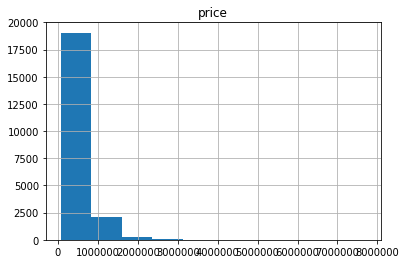

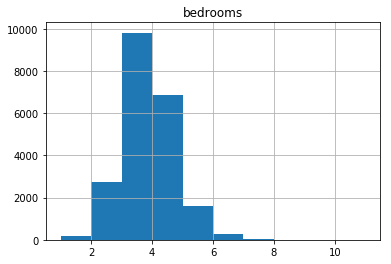

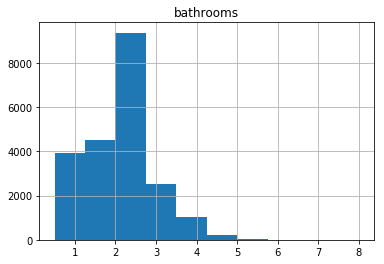

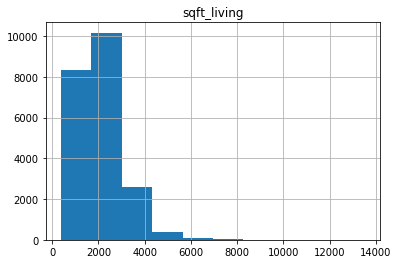

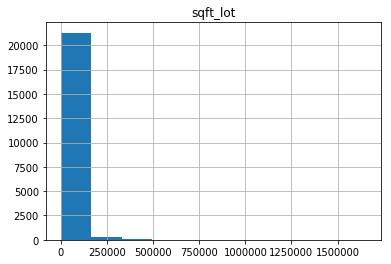

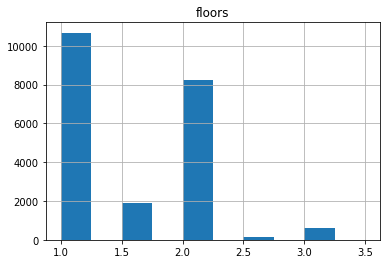

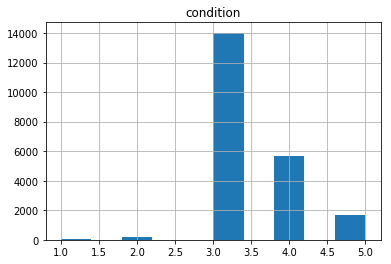

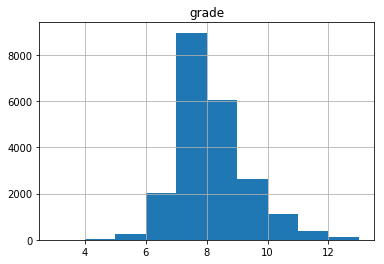

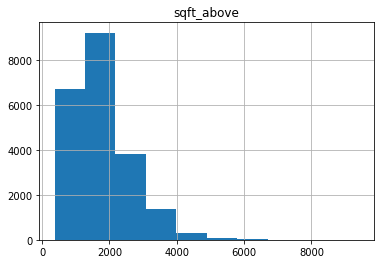

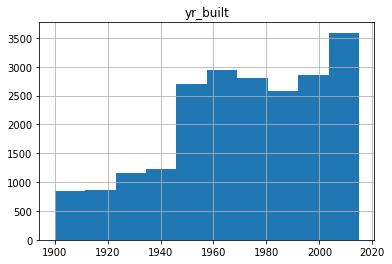

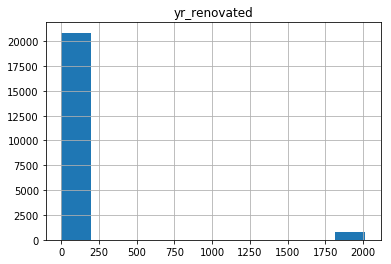

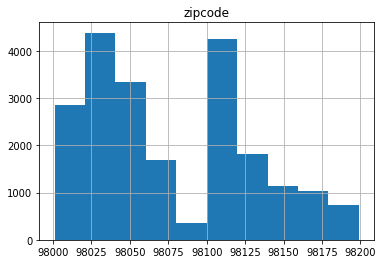

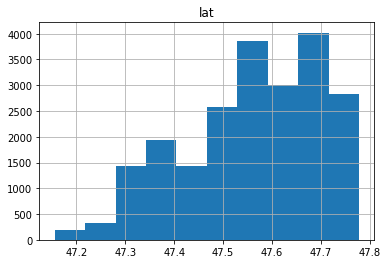

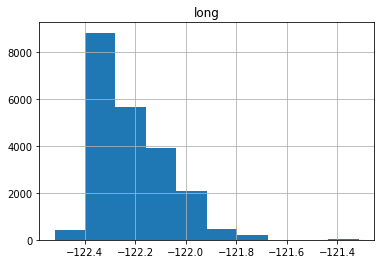

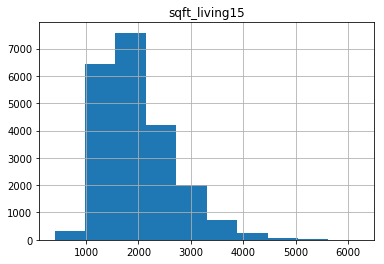

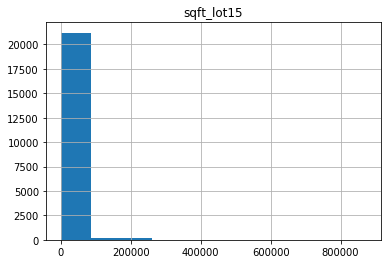

In [29]:
# explore distributions of column values that have already been cleaned 
cleaned_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
for col in cleaned_columns:
    df.hist(column=col);

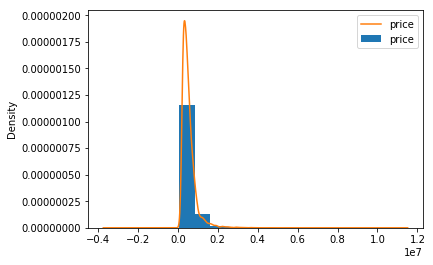

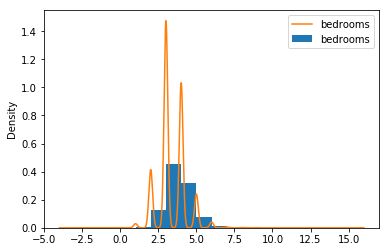

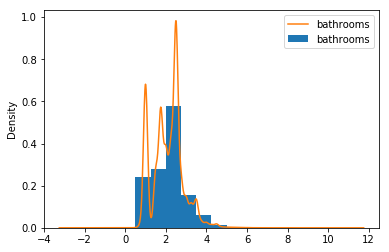

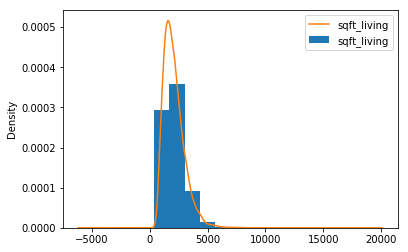

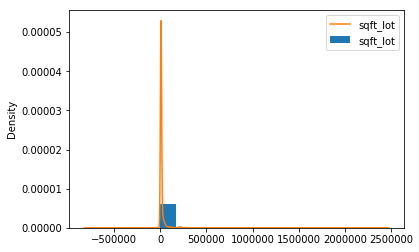

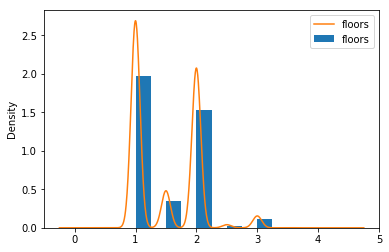

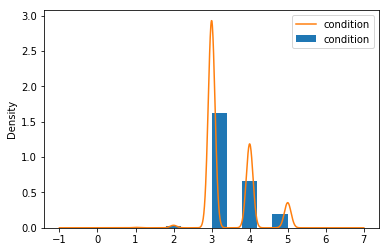

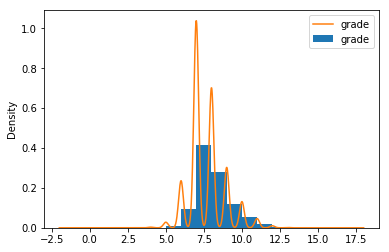

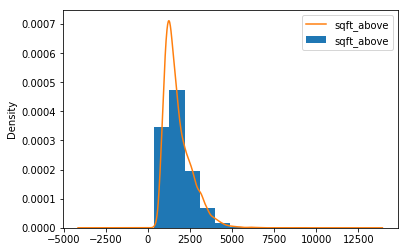

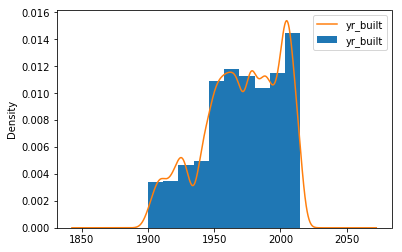

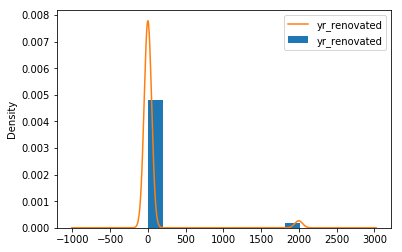

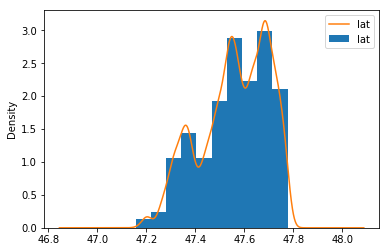

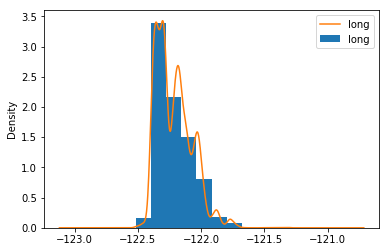

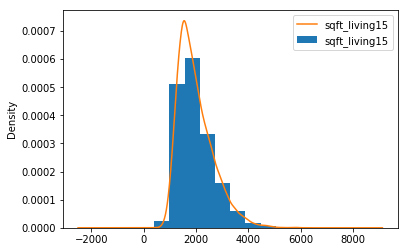

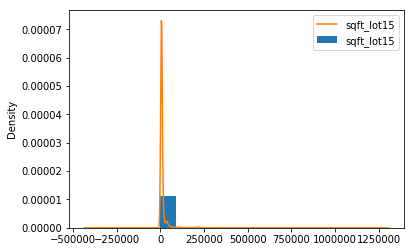

In [33]:
# Normalized histograms with kde plots
cleaned_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
for col in cleaned_columns:
    df[col].plot.hist(density=True)
    df[col].plot.kde(label=col)
    plt.legend()
    plt.show()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


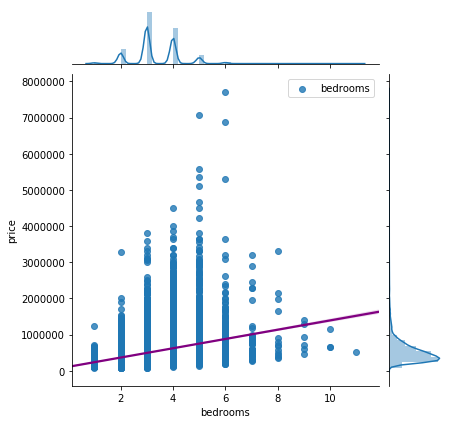

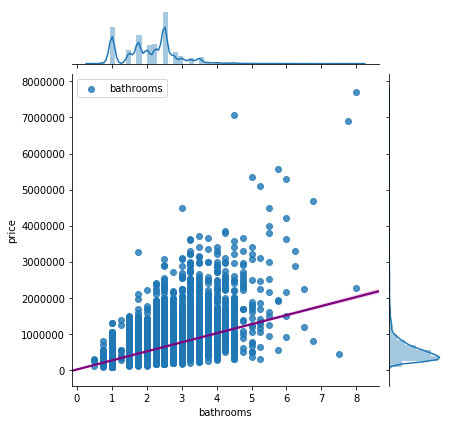

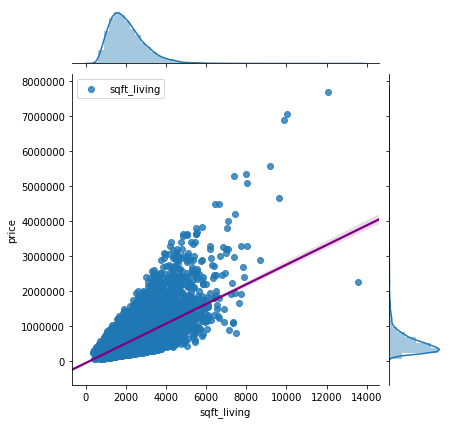

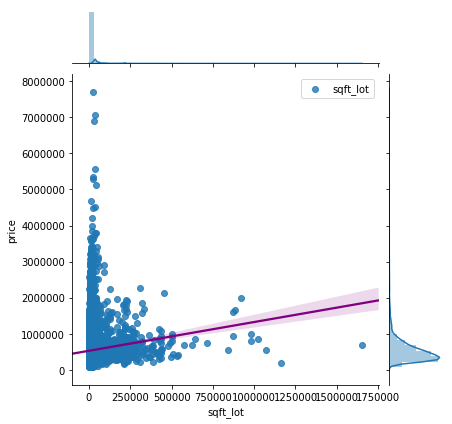

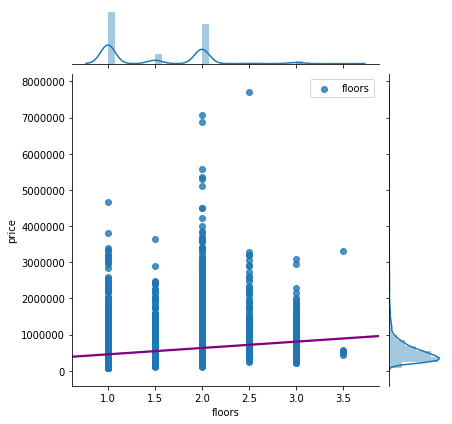

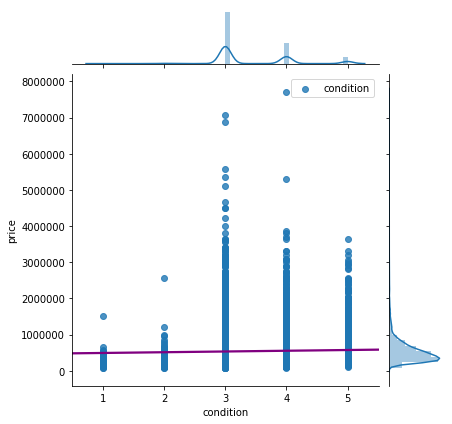

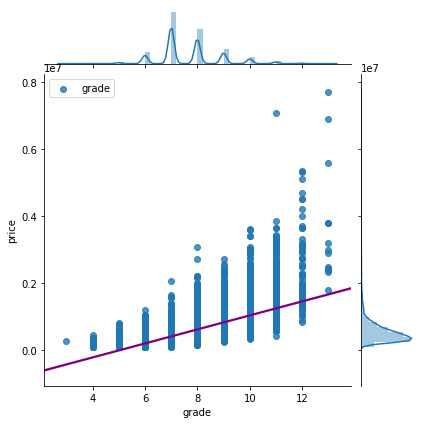

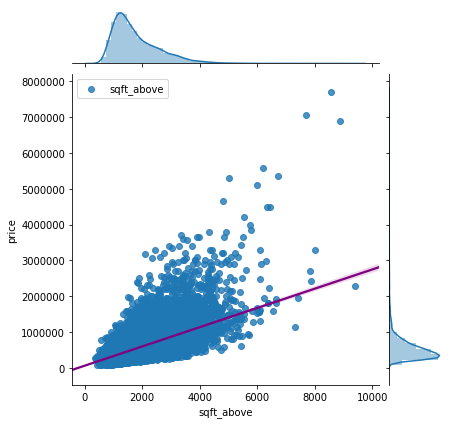

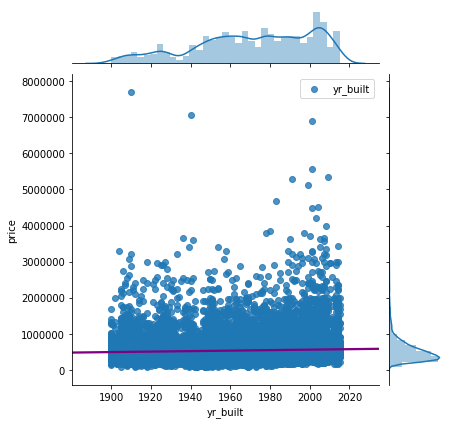

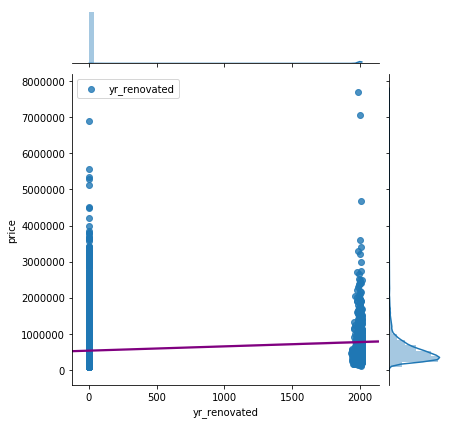

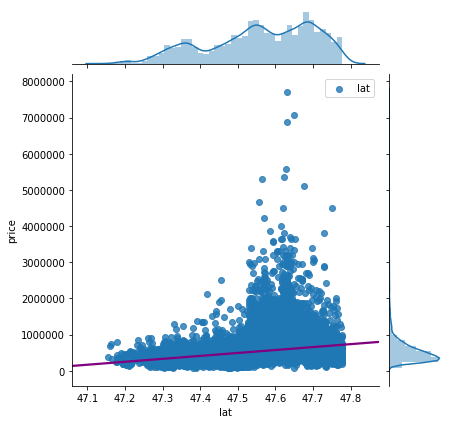

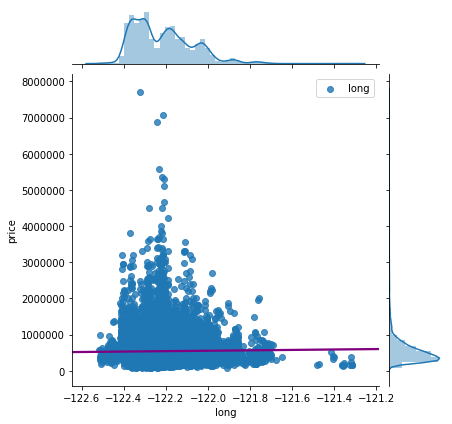

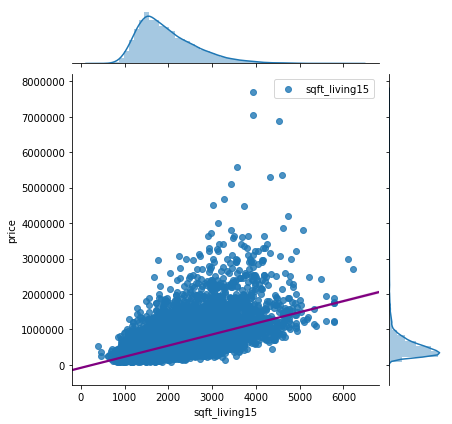

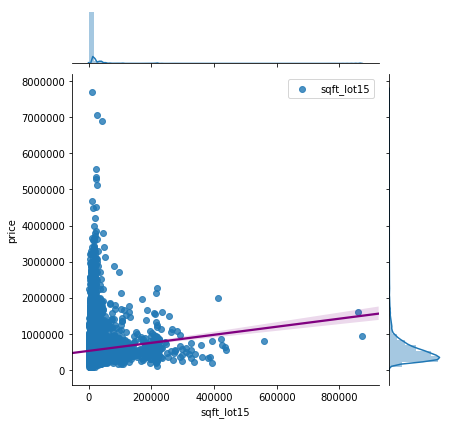

In [34]:
# Build joint plots to examine relationship between predictors and target variable
cleaned_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
for col in cleaned_columns:
    sns.jointplot(x=col, y='price', data=df, kind='reg', label=col, joint_kws={'line_kws':{'color':'purple'}})
    plt.legend()
    plt.show()

### Initial Observations
The joint plots with the regression lines show possible relationships between the predictor variables and target variable that warrant further investigation. Positive correlations that are observable now (before any feature engineering) include the predictor variables of bedrooms, bathrooms, sqft_living, sqft_lot, floors (slight), grade, sqft_above, lat (slight), sqft_living15, and sqft_lot15. 

Remember: sqft_basement is not yet included

## Modeling - an Iterative Process

* Use questions to guide models
* Generate meaningful visualizations
* Normalize values as needed
* Use models to examine relationships between variables
* Assess model fit and robustness

## Interpret

* Draw conclusions from the data that answer initial questions or that raise new questions
* Evaluate meaning of results from a technical perspective
* Evaluate meaning of results for non-technical stakeholders
* Present and communicate results based on audience 